# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="
#params = {"appid":weather_api_key,"limit":1}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | shiguai
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | nagqu
Processing Record 5 of Set 1 | sandnessjoen
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | tapiramuta
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | kourou
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | porbandar
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | papao
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | grytviken
Processi

Processing Record 36 of Set 4 | saint-pierre
Processing Record 37 of Set 4 | timbuktu
Processing Record 38 of Set 4 | iwanai
Processing Record 39 of Set 4 | mahibadhoo
Processing Record 40 of Set 4 | canutama
Processing Record 41 of Set 4 | kulhudhuffushi
Processing Record 42 of Set 4 | espargos
City not found. Skipping...
Processing Record 43 of Set 4 | sodra sandby
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | chonchi
Processing Record 46 of Set 4 | standerton
Processing Record 47 of Set 4 | bullsbrook
Processing Record 48 of Set 4 | biga
Processing Record 49 of Set 4 | camalu
Processing Record 0 of Set 5 | saldanha
Processing Record 1 of Set 5 | waingapu
Processing Record 2 of Set 5 | copiapo
Processing Record 3 of Set 5 | fort mcmurray
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | chunskiy
Processing Record 6 of Set 5 | taroa
Processing Record 7 of Set 5 | knoxville
Processing Record 8 of Set 5 | roanoke rapids
Process

Processing Record 27 of Set 8 | santana
Processing Record 28 of Set 8 | miyanoura
City not found. Skipping...
Processing Record 29 of Set 8 | taber
Processing Record 30 of Set 8 | bikenibeu village
Processing Record 31 of Set 8 | north bend
Processing Record 32 of Set 8 | as sulayyil
Processing Record 33 of Set 8 | goundi
Processing Record 34 of Set 8 | morant bay
Processing Record 35 of Set 8 | langxiang
Processing Record 36 of Set 8 | pyt-yakh
Processing Record 37 of Set 8 | dalnegorsk
Processing Record 38 of Set 8 | rudnya
Processing Record 39 of Set 8 | naini tal
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | nassau
Processing Record 42 of Set 8 | vista hermosa de negrete
Processing Record 43 of Set 8 | kigonsera
Processing Record 44 of Set 8 | ar ruways
Processing Record 45 of Set 8 | undurkhaan
Processing Record 46 of Set 8 | puerto armuelles
Processing Record 47 of Set 8 | toga village
City not found. Skipping...
Processing Record 48 of Set 8 | iwaki
Proces

Processing Record 20 of Set 12 | winslow
Processing Record 21 of Set 12 | rouissat
Processing Record 22 of Set 12 | lake los angeles
Processing Record 23 of Set 12 | city of balikpapan
Processing Record 24 of Set 12 | bechem
Processing Record 25 of Set 12 | belmonte
Processing Record 26 of Set 12 | beshkent
Processing Record 27 of Set 12 | port blair
Processing Record 28 of Set 12 | tete
Processing Record 29 of Set 12 | ust'-ilimsk
Processing Record 30 of Set 12 | palafrugell
Processing Record 31 of Set 12 | lev tolstoy
Processing Record 32 of Set 12 | mogocha
Processing Record 33 of Set 12 | ankazobe
Processing Record 34 of Set 12 | necocli
Processing Record 35 of Set 12 | guiuan
Processing Record 36 of Set 12 | carutapera
Processing Record 37 of Set 12 | mo i rana
Processing Record 38 of Set 12 | sola
Processing Record 39 of Set 12 | baoqing
Processing Record 40 of Set 12 | jackson
Processing Record 41 of Set 12 | igarka
Processing Record 42 of Set 12 | mongo
Processing Record 43 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.34,86,31,10.48,PN,1691497106
1,shiguai,40.7058,110.2856,26.38,39,6,2.43,CN,1691497106
2,puerto natales,-51.7236,-72.4875,-2.82,94,95,1.33,CL,1691497106
3,nagqu,31.5000,92.0000,14.42,57,100,0.63,CN,1691497107
4,sandnessjoen,66.0217,12.6316,26.29,56,20,7.72,NO,1691497107


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.34,86,31,10.48,PN,1691497106
1,shiguai,40.7058,110.2856,26.38,39,6,2.43,CN,1691497106
2,puerto natales,-51.7236,-72.4875,-2.82,94,95,1.33,CL,1691497106
3,nagqu,31.5000,92.0000,14.42,57,100,0.63,CN,1691497107
4,sandnessjoen,66.0217,12.6316,26.29,56,20,7.72,NO,1691497107


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

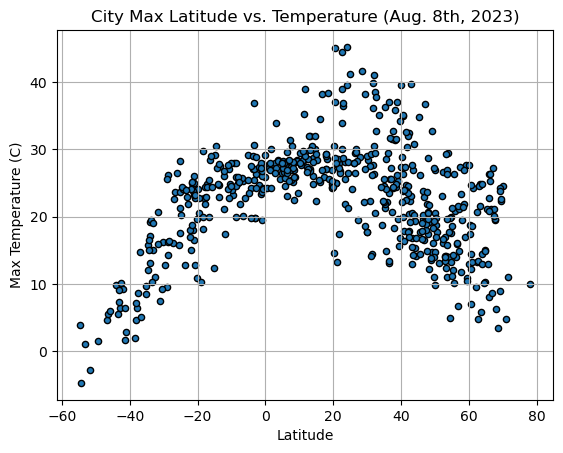

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

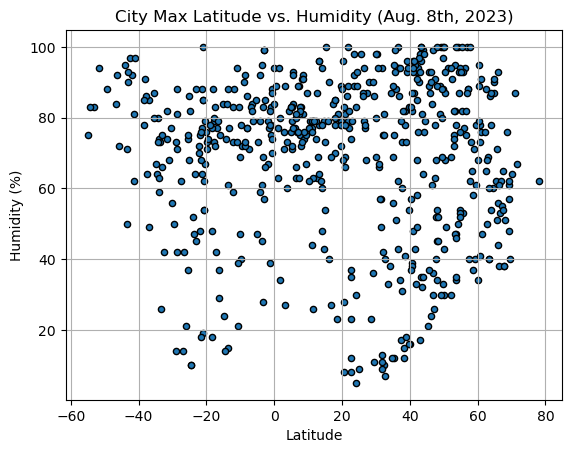

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

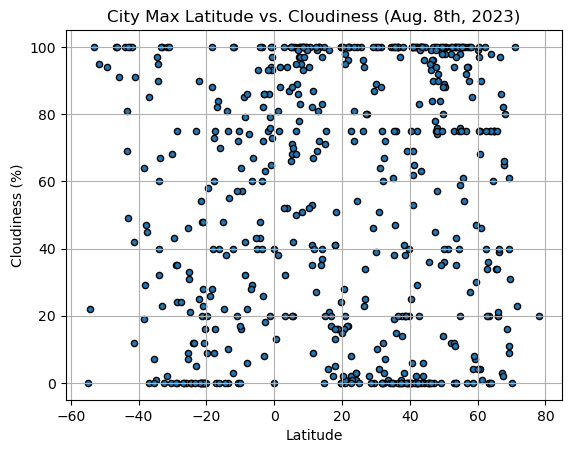

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

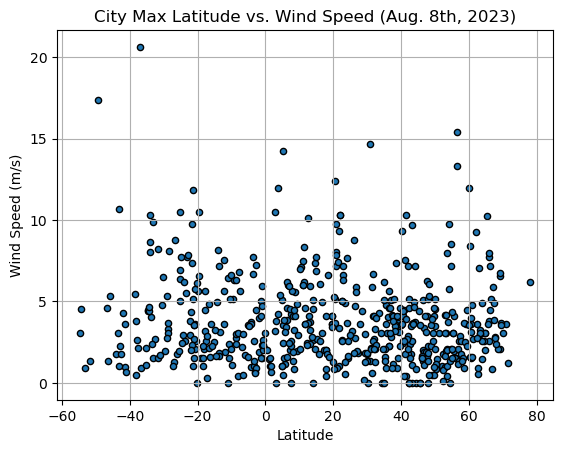

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg_plots(xvalues, yvalues, xlabel, ylabel):
    x_values = xvalues
    y_values = yvalues
    x_label = xlabel
    y_label = ylabel
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_value = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    correlation = st.pearsonr(xvalues,yvalues)
    print(f"The r value is: {correlation[0]}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shiguai,40.7058,110.2856,26.38,39,6,2.43,CN,1691497106
3,nagqu,31.5000,92.0000,14.42,57,100,0.63,CN,1691497107
4,sandnessjoen,66.0217,12.6316,26.29,56,20,7.72,NO,1691497107
7,yellowknife,62.4560,-114.3525,13.29,88,40,3.60,CA,1691496947
10,hamilton,39.1834,-84.5333,19.57,93,0,1.54,US,1691496930


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.34,86,31,10.48,PN,1691497106
2,puerto natales,-51.7236,-72.4875,-2.82,94,95,1.33,CL,1691497106
5,edinburgh of the seven seas,-37.0676,-12.3116,14.75,85,85,20.63,SH,1691497107
6,san antonio de pale,-1.4014,5.6325,23.34,77,86,5.06,GQ,1691497107
8,tapiramuta,-11.8472,-40.7914,17.43,88,100,1.87,BR,1691497108


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.5575980512788693


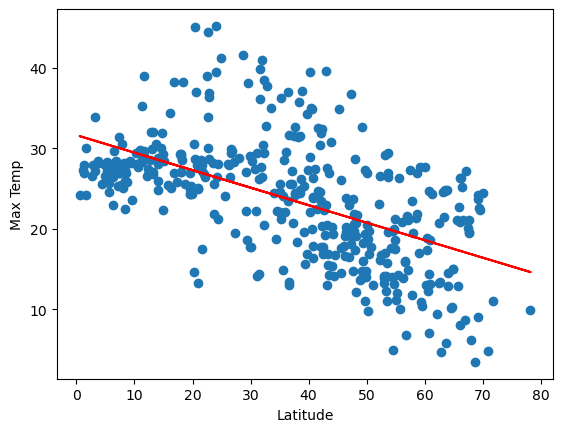

In [15]:
# Linear regression on Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: 0.8205336734391805


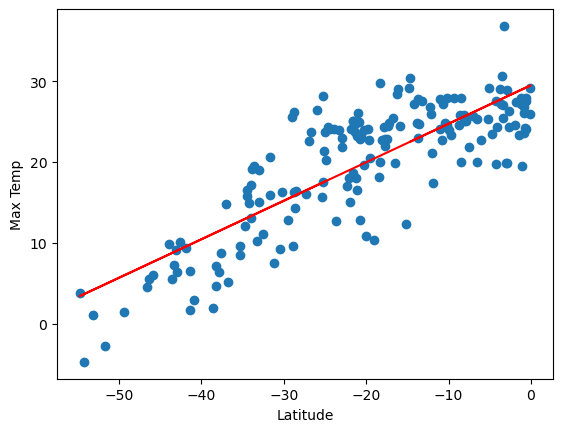

In [16]:
# Linear regression on Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.09079314198203688


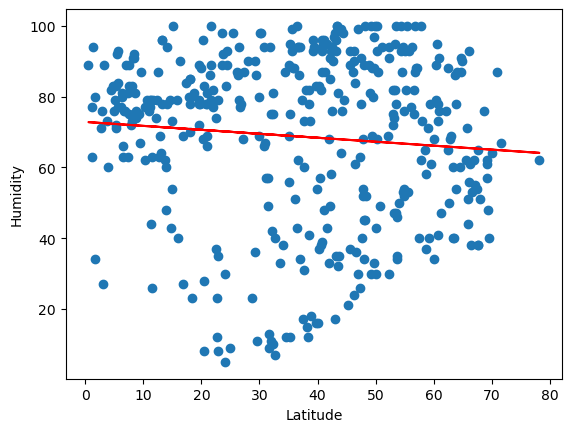

In [17]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: -0.0326560900438501


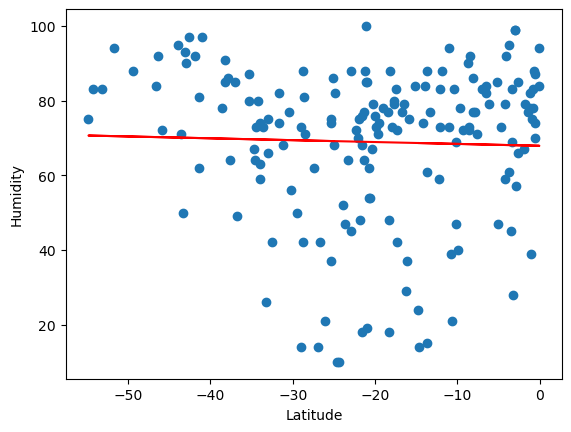

In [18]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.07428899284022773


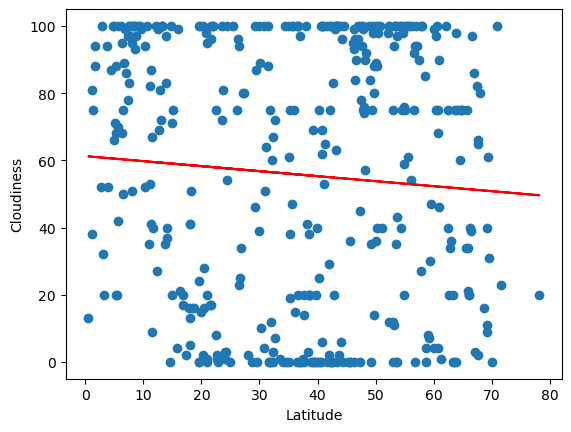

In [19]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: 0.020978335270019893


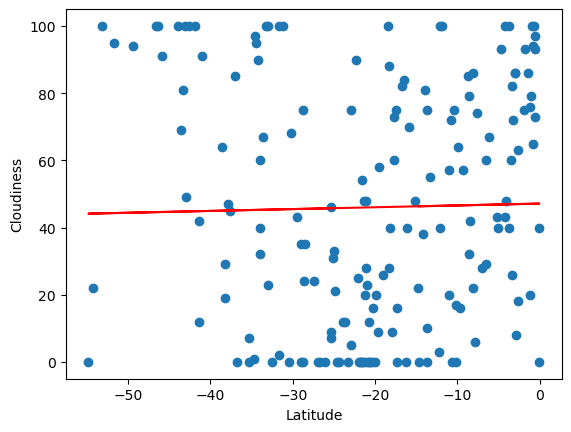

In [20]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.06724393890869662


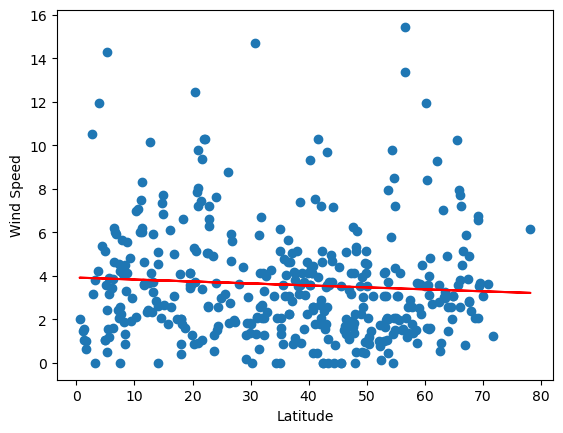

In [21]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: -0.15783909309803515


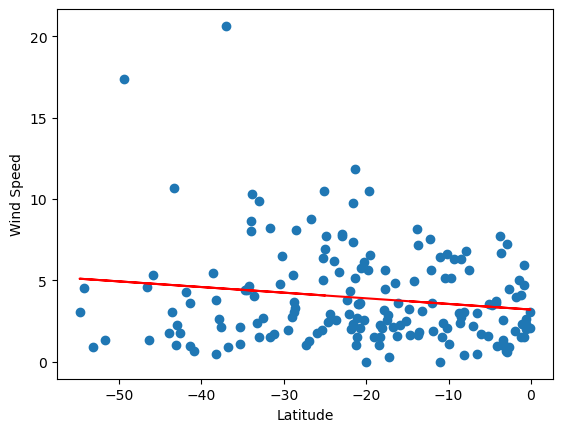

In [22]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE